**How can we accurately predict individual customer preferences and needs?**

- Develop a recommendation system to suggest relevant products and services.
- Identify key factors influencing customer preferences

In [2]:
import os
import numpy as np
import pandas as pd
from pandas.api.types import is_object_dtype

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix

In [3]:
# Load the data
# Helper function
def load_data(filename):
    '''load the data with only filename'''
    return pd.read_csv(os.path.join(PATH, filename))

# Set path 
parent_directory = os.path.abspath(os.path.join('..'))
PATH = os.path.join(parent_directory, 'data')

# Load dataset
df = load_data('final_dataset.csv')

Data Cleaning

In [5]:
# Drop irrelevant column
cols_to_drop = ['Unnamed: 0', 'Attrition_Flag', 'Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']
cols_to_keep = ['Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Total_Relationship_Count', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'risk_factor']
df1 = df.drop(columns=cols_to_drop)

# Convert into appropriate data type
levels = {'Education_Level': ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate'
 'Doctorate'],
          'Income_Category': ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'],
          'Card_Category': ['Blue', 'Silver', 'Gold', 'Platinum']}

# Transform data to appropriate type
for col in df1.columns:
    if is_object_dtype(df[col]):
        # If column is ordinal variable
        if col in levels.keys():
            df1[col] = pd.Categorical(df[col], categories=levels[col], ordered=True)
        # If column is not ordinal variable
        else:
            df1[col] = df1[col].astype('string')


In [6]:
# Convert products into binary (whether users have the product or not, or in the case where all users have the product, whether they got an upgrade)
product_list = set(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
features_list = list(set(df.columns).difference(product_list))

df2 = df1
for product in product_list:
    # Since minimum is 1, the recommendation would be based on whether an upgrade should be recommended
    if product in ['C', 'D', 'G']:
        df2[product] = np.where(df2[product] > 1, 1, 0)
    # Some users do not have this product at all
    else:
        df2[product] = np.where(df2[product] > 0, 1, 0)

In [7]:

# Separate training features 
categorical_columns = set(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])
numerical_columns = list(set(df2.columns).difference(categorical_columns, product_list))
numerical_columns.remove('CLIENTNUM')

EDA: Identify key features

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

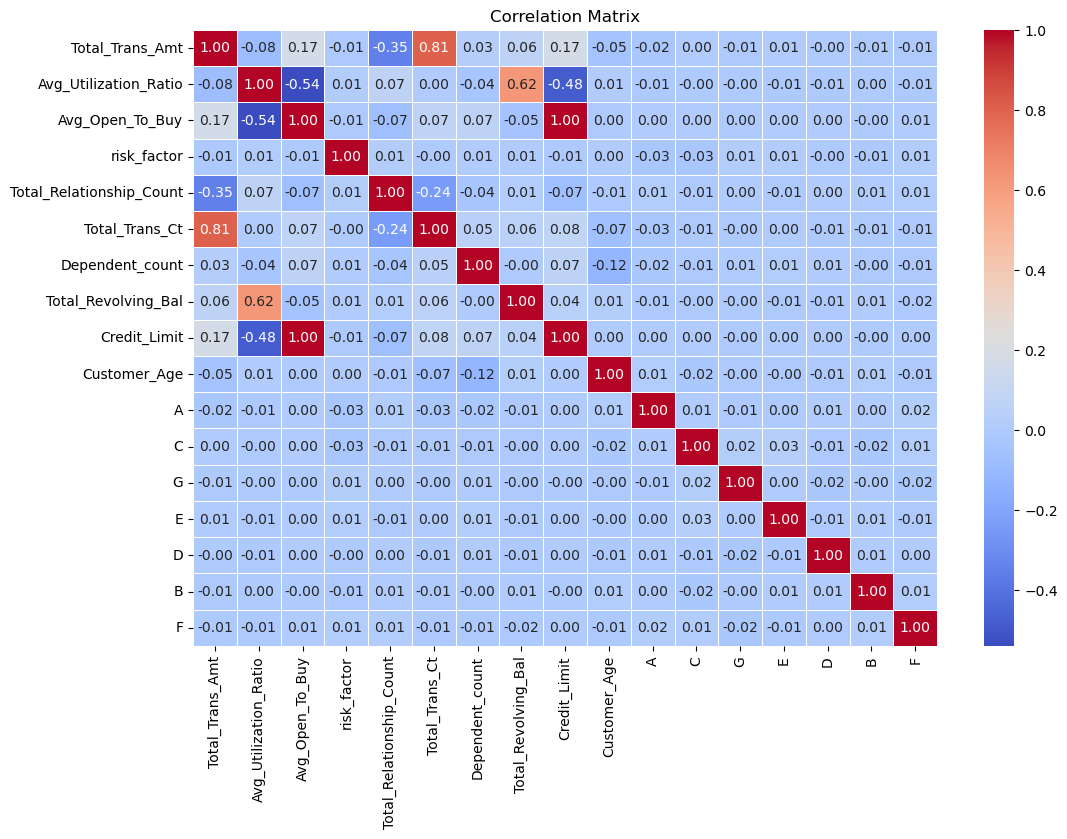

In [10]:
# Examine correlation
numerical_df = df[numerical_columns+list(product_list)]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# PCA
# Between all X features

# Between products only

In [ ]:
# automatic feature selection

Standardisation

In [18]:
# Scale the data
df3 = df2
scaler = StandardScaler()
scaled = scaler.fit_transform(df3[numerical_columns].to_numpy())
df3[numerical_columns] = pd.DataFrame(scaled, columns=numerical_columns)
df3 = df3.set_index('CLIENTNUM')
X = pd.get_dummies(df3)

In [14]:
X.head(5)

,Customer_Age,Dependent_count,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,A,...,Income_Category_Less than $40K,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_$120K +,Income_Category_Unknown,Card_Category_Blue,Card_Category_Silver,Card_Category_Gold,Card_Category_Platinum
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,-0.165406,0.503368,0.763943,0.446622,-0.473422,0.488971,-0.959707,-0.973895,-0.775882,1,...,False,False,True,False,False,False,True,False,False,False
818770008,0.333570,2.043199,1.407306,-0.041367,-0.366667,-0.008486,-0.916433,-1.357340,-0.616276,1,...,True,False,False,False,False,False,True,False,False,False
713982108,0.583058,0.503368,0.120579,-0.573698,-1.426858,-0.445658,-0.740982,-1.911206,-0.997155,0,...,False,False,False,True,False,False,True,False,False,False
769911858,-0.789126,1.273283,-0.522785,-0.585251,1.661686,-0.734100,-0.951758,-1.911206,1.759686,1,...,True,False,False,False,False,False,True,False,False,False
709106358,-0.789126,0.503368,0.763943,-0.430877,-1.426858,-0.302868,-1.056263,-1.570365,-0.997155,1,...,False,False,True,False,False,False,True,False,False,False


Model training and testing

In [7]:
# libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
# Incorporating customers' profile: gradient boosting decision tree
# gradient boosting decision tree with logistic regression (including other products in the training dataset)
predicted_labels = {}
actual_labels = {}
for i in product_list:
    y = df3[i]
    train = X.drop(columns=i)
    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=123)

    gbdt_model = GradientBoostingClassifier(n_estimators=300,  # Number of boosting stages
                                            learning_rate=0.1,  
                                            max_depth=3, 
                                            random_state=123) 
    gbdt_model.fit(X_train.to_numpy(), y_train.to_numpy())
    
    features = gbdt_model.apply(X_train.to_numpy())[:, :, 0]

    # train the LR model using the GBDT generated features
    lr_model = LogisticRegression(max_iter=2000, C=0.5, random_state=123)

    lr_model.fit(features, y_train.to_numpy())

    # generate LR features
    gbdt_features_test = gbdt_model.apply(X_test.to_numpy())[:, :, 0]
    lr_features = lr_model.predict_proba(gbdt_features_test)[:, 1]
    
    # store the predicted score for the product
    predicted_labels[i] = lr_features
    actual_labels[i] = y_test
    

c:\Users\anncy\anaconda3\envs\default\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\anncy\anaconda3\envs\default\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [26]:
def get_results(results, x):
    r = pd.DataFrame(results)
    df = pd.concat([x.reset_index(names = 'CLIENTNUM'), r], axis = 1, ignore_index = True)

    col_list = ['CLIENTNUM'] + list(x.columns) + list(r.columns)
    df.columns = col_list
    
    return df[['CLIENTNUM'] + list(r.columns)]

In [41]:
# Prediction
pldf = get_results(predicted_labels, X_test.drop(columns=[c for c in product_list if c in X_test.columns]))
pldf = pldf.set_index('CLIENTNUM')
pldf = pldf.apply(lambda x: np.where(x > 0.5, 1, 0))
pldf.head(5)

,A,E,B,C,F,G,D
CLIENTNUM,,,,,,,
716093133,1,0,1,1,0,1,1
770662383,1,1,1,1,1,1,1
714622833,1,0,1,1,1,1,1
711336033,1,1,0,1,1,1,1
715848408,0,1,1,1,1,1,1


Evaluation

In [35]:
# Get actual labels
aldf = pd.DataFrame(actual_labels)
aldf.head(5)

,A,E,B,C,F,G,D
CLIENTNUM,,,,,,,
716093133,0,1,0,1,1,1,0
770662383,0,0,1,1,1,1,1
714622833,0,0,0,1,1,1,1
711336033,0,0,1,1,1,1,1
715848408,1,1,0,1,1,1,0


In [46]:
total_users = aldf.shape[0]
total_users

2026

In [36]:
# Get accuracy
confusion_matrixes = {}
for col in aldf.columns:
    confusion_matrixes[col] = confusion_matrix(aldf[col], pldf[col])

In [37]:
# the count of true negatives is C00, false negatives is C10, true positives is C11 and false positives is C01
confusion_matrixes

{'A': array([[ 114,  606],
        [ 214, 1092]], dtype=int64),
 'E': array([[575, 491],
        [496, 464]], dtype=int64),
 'B': array([[562, 502],
        [490, 472]], dtype=int64),
 'C': array([[  36,  604],
        [ 100, 1286]], dtype=int64),
 'F': array([[  60,  585],
        [ 150, 1231]], dtype=int64),
 'G': array([[  45,  526],
        [  87, 1368]], dtype=int64),
 'D': array([[   9,  426],
        [  39, 1552]], dtype=int64)}

In [25]:
# old results (with only demographic features) 
#old_results = confusion_matrixes
#old_results

{'A': array([[  96,  624],
        [ 183, 1123]], dtype=int64),
 'E': array([[575, 491],
        [540, 420]], dtype=int64),
 'B': array([[554, 510],
        [473, 489]], dtype=int64),
 'C': array([[  53,  587],
        [ 112, 1274]], dtype=int64),
 'F': array([[  55,  590],
        [ 150, 1231]], dtype=int64),
 'G': array([[  42,  529],
        [  81, 1374]], dtype=int64),
 'D': array([[   9,  426],
        [  47, 1544]], dtype=int64)}